In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pandas.read_csv('training_data.csv', sep='\t')

data_table = df.head()

In [3]:
shape = df.shape

In [4]:
def preprocess(data):    
    #transform the skewed distributions (misspelled words, words, and words per sentence) into uniform distributions
    uniform = np.log(data[['misspelled words', 'words', 'words per sentence']])

    #add lexical diversity to the dataframe
    uniform.insert(3, 'lexical diversity', data['lexical diversity'], False)

    #replace non-numerical values in misspelled words with 0
    uniform['misspelled words'] = uniform['misspelled words'].replace([np.inf, -np.inf], 0)
    
    return uniform

In [5]:
preprocessed_data = preprocess(df)
X = preprocessed_data[['misspelled words', 'words', 'words per sentence', 'lexical diversity']].values
y = df['normalized score'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(20,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [8]:
from IPython.display import set_matplotlib_formats

#Generate plot
set_matplotlib_formats('svg')

plot1 = plt.figure(1)
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color='Limegreen')
plt.plot(neighbors, train_accuracy, label='Training accuracy', color='Gray')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plt.close()

/var/folders/wm/5yntx2ss5rs8y1t4qhwdwsw40000gn/T/ipykernel_54762/1948914630.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [9]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=26)

In [10]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [11]:
#Get accuracy
accuracy_score = knn.score(X_test,y_test)
inaccurate = 1 - accuracy_score

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Correct', 'Incorrect'
sizes = [accuracy_score, inaccurate]

colors = ('Limegreen', 'Gray')
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Correct')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.close()

In [13]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [14]:
crosstab = pandas.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from spellchecker import SpellChecker
import ipywidgets as widgets
from IPython.display import display, Markdown

In [16]:
display(Markdown('# Auto Grader'))

# Auto Grader

In [17]:
output1 = widgets.Output()
output2 = widgets.Output()
output3 = widgets.Output()
output4 = widgets.Output()
output5 = widgets.Output()
output6 = widgets.Output()

In [18]:
username = widgets.Text(
    placeholder='username',
    description='Username:',
    disabled=False
)

password = widgets.Password(
    placeholder='password',
    description='Password:',
    disabled=False
)

display(username)
display(password)

Text(value='', description='Username:', placeholder='username')

Password(description='Password:', placeholder='password')

In [73]:
import pymysql
import paramiko
import os 
import sys
import subprocess
from paramiko import SSHClient
from sshtunnel import SSHTunnelForwarder

In [72]:
def authenticate(usrnm, psswrd):
    if (len(usrnm)==0) or (len(psswrd)==0):
        print("Error: Username AND/OR Password is blank. Complete both fields to continue.")
        
    else:
        
        mypkey = paramiko.RSAKey.from_private_key_file('auto_grader_kp.pem')
        # if you want to use ssh password use - ssh_password='your ssh password', bellow

        sql_hostname = 'database.c6m1wpjwna5v.us-east-1.rds.amazonaws.com'
        sql_username = 'admin'
        sql_password = 'gyjqef-dogni2-Fuxhub'
        sql_main_database = 'auto_grader_db'
        sql_port = 3306
        ssh_host = '35.153.120.37'
        ssh_user = 'ec2-user'
        ssh_port = 22

        with SSHTunnelForwarder(
                (ssh_host, ssh_port),
                ssh_username=ssh_user,
                ssh_pkey=mypkey,
                remote_bind_address=(sql_hostname, sql_port)) as tunnel:
            
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            
            ###Authenticate username and password###
            cur = conn.cursor()
            query = 'SELECT COUNT(*) FROM users WHERE username=%s AND password=%s;'
            val = (usrnm, psswrd)
            
            try:
                cur.execute(query, val)
                result = cur.fetchone()[0]
                
                if result == 0:
                    print("Invalid Username AND/OR Password. Please try again.")
                    conn.close()
                    
                else:
                    display(author)
                    display(essay)
                    display(submit_button)

                    username.close()
                    password.close()
                    login_button.close()
                    conn.close()
            
            except MySQLError as ex:
                print(ex)
                conn.close()

In [21]:
@output1.capture(clear_output=True,wait=True)
def on_login_button(b):
    authenticate(username.value, password.value)
    
output1

Output()

In [22]:
login_button = widgets.Button(
    description='Login',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='sign-in-alt' # (FontAwesome names without the `fa-` prefix)
)

login_button.on_click(on_login_button)
display(login_button)

Button(description='Login', icon='sign-in-alt', style=ButtonStyle(), tooltip='Click me')

In [23]:
author = widgets.Text(
    placeholder='author name',
    description='Author:',
    disabled=False
)

essay = widgets.Textarea(
    placeholder='type OR copy/paste essay',
    description='Essay:',
    disabled=False
)

In [24]:
@output2.capture(clear_output=True,wait=True)
def on_submit_button(b):
    if (len(author.value)==0) or (len(essay.value)==0):
        print("Error: Author Name AND/OR Essay is blank. Complete both fields to continue.")
        
    else:
        grade(essay.value)
        
output2

Output()

In [25]:
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check-circle' # (FontAwesome names without the `fa-` prefix)
)

submit_button.on_click(on_submit_button)

In [26]:
import csv

In [27]:
def insert_score(author, score):
    mypkey = paramiko.RSAKey.from_private_key_file('auto_grader_kp.pem')
    # if you want to use ssh password use - ssh_password='your ssh password', bellow

    sql_hostname = 'database.c6m1wpjwna5v.us-east-1.rds.amazonaws.com'
    sql_username = 'admin'
    sql_password = 'gyjqef-dogni2-Fuxhub'
    sql_main_database = 'auto_grader_db'
    sql_port = 3306
    ssh_host = '35.153.120.37'
    ssh_user = 'ec2-user'
    ssh_port = 22

    with SSHTunnelForwarder(
            (ssh_host, ssh_port),
            ssh_username=ssh_user,
            ssh_pkey=mypkey,
            remote_bind_address=(sql_hostname, sql_port)) as tunnel:

        conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                passwd=sql_password, db=sql_main_database,
                port=tunnel.local_bind_port)

        ###Authenticate username and password###
        cur = conn.cursor()
        query = 'INSERT INTO reports(user_id, author, score, date_time) VALUES(%s, %s, %s, NOW())'
        val = [1, author, score]

        try:
            cur.execute(query, val)
            conn.commit()
            conn.close()

        except MySQLError as ex:
            print(ex)
            conn.close()

In [68]:
@output3.capture(clear_output=True,wait=True)
def on_report_button(b):
    
    mypkey = paramiko.RSAKey.from_private_key_file('auto_grader_kp.pem')
    # if you want to use ssh password use - ssh_password='your ssh password', bellow

    sql_hostname = 'database.c6m1wpjwna5v.us-east-1.rds.amazonaws.com'
    sql_username = 'admin'
    sql_password = 'gyjqef-dogni2-Fuxhub'
    sql_main_database = 'auto_grader_db'
    sql_port = 3306
    ssh_host = '35.153.120.37'
    ssh_user = 'ec2-user'
    ssh_port = 22

    with SSHTunnelForwarder(
            (ssh_host, ssh_port),
            ssh_username=ssh_user,
            ssh_pkey=mypkey,
            remote_bind_address=(sql_hostname, sql_port)) as tunnel:

        conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                passwd=sql_password, db=sql_main_database,
                port=tunnel.local_bind_port)

        ###Authenticate username and password###
        cur = conn.cursor()
        query = 'SELECT * FROM reports WHERE user_id=%s'
        val = 1

        try:
            cur.execute(query, val)

            rows = cur.fetchall()
            fp = open('report_card.csv', 'w')
            file = csv.writer(fp)
            file.writerows(rows)
            fp.close()
            
            #view the report#
            if sys.platform == "win32":
                os.startfile('report_card.csv')
            else:
                opener = "open" if sys.platform == "darwin" else "xdg-open"
                subprocess.call([opener, 'report_card.csv'])
            
            conn.close()

        except MySQLError as ex:
            print(ex)
            conn.close()

output3

Output()

In [66]:
report_button = widgets.Button(
    description='Generate Report',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='file-export' # (FontAwesome names without the `fa-` prefix)
)

report_button.on_click(on_report_button)

In [30]:
def grade(text):
    
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    spell = SpellChecker()
    misspelled = spell.unknown(words)

    ###FEATURE 1: MISSPELLED WORDS###
    num_misspelled = len(misspelled)

    stops = set(stopwords.words('english'))

    filtered_words = []

    for w in words:
        if w in misspelled:
            continue

        if w not in stops:
            filtered_words.append(w)

    ###FEATURE 2: TOTAL WORDS###
    total_words = len(filtered_words)

    ###FEATURE 3: WORDS PER SENTENCE###
    words_per_sentence = total_words / len(sentences)

    unique_words = len(set(filtered_words))

    ###FEATURE 4: LEXICAL DIVERSITY###
    lexical_diversity = unique_words / total_words

    #Data Preprocessing
    features = [[num_misspelled, total_words, words_per_sentence, lexical_diversity]]
    prediction_df = pandas.DataFrame(features, columns = ['misspelled words', 'words', 'words per sentence', 'lexical diversity'])
    preprocessed_data = preprocess(prediction_df)

    #Predicted Score
    predicted_score = knn.predict(preprocessed_data)[0]
    score_codes = ['FAIL', 'PASS']
    
    #Insert Score into Database
    insert_score(author.value, score_codes[predicted_score])

    print('Grade: ' + score_codes[predicted_score])

    ###Wordcount###
    rslt_df = df[df['normalized score'] == predicted_score]

    mean_words = rslt_df['words'].mean()

    x_labels = ['This Essay', 'Average Essay of a Similar Score']
    word_vals = [total_words, mean_words]

    x_pos = [i for i, _ in enumerate(x_labels)]

    plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

    plt.ylabel("Number of Words")
    plt.title("Wordcount")
    plt.xticks(x_pos, x_labels)

    plt.show()

    ###Misspellings###
    rslt_df = df[df['normalized score'] == predicted_score]

    mean_errors = rslt_df['misspelled words'].mean()

    x_labels = ['This Essay', 'Average Essay of a Similar Score']
    word_vals = [num_misspelled, mean_errors]

    x_pos = [i for i, _ in enumerate(x_labels)]

    plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

    plt.ylabel("Number of Misspellings")
    plt.title("Misspellings")
    plt.xticks(x_pos, x_labels)
    
    plt.show()

    ###Lexical Diversity###
    rslt_df = df[df['normalized score'] == predicted_score]

    mean_diversity = rslt_df['lexical diversity'].mean()

    x_labels = ['This Essay', 'Average Essay of a Similar Score']
    word_vals = [lexical_diversity, mean_diversity]

    x_pos = [i for i, _ in enumerate(x_labels)]

    plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

    plt.ylabel("Ratio of Unique Words")
    plt.title("Lexical Diversity")
    plt.xticks(x_pos, x_labels)

    plt.show()
    
    #Generate report
    display(report_button)

In [31]:
@output5.capture(clear_output=True,wait=True)
def on_info_button(b):
    display(data_table)
    display(plot1)
    display(crosstab)
    display(fig1)
    
    info_button.close()
        
output5

Output()

In [32]:
info_button = widgets.Button(
    description='More Info',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='info-circle' # (FontAwesome names without the `fa-` prefix)
)

info_button.on_click(on_info_button)
display(info_button)

Button(description='More Info', icon='info-circle', style=ButtonStyle(), tooltip='Click me')

In [33]:
display(Markdown('## Essay Data'))

## Essay Data

In [34]:
display(data_table)

,essay id,misspelled words,words,words per sentence,lexical diversity,raw score,normalized score
0,5979,15,130,10.833333,0.600000,2,1
1,5980,4,62,7.750000,0.774194,1,0
2,5981,7,42,14.000000,0.952381,1,0
3,5982,11,70,23.333333,0.685714,2,1
4,5983,4,43,14.333333,0.790698,1,0


In [35]:
display(Markdown('## Number of Neighbors Used for Classification'))

## Number of Neighbors Used for Classification

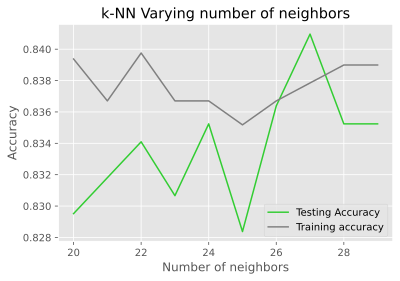

In [36]:
display(plot1)

In [37]:
display(Markdown('## Model Accuracy'))

## Model Accuracy

In [38]:
display(crosstab)

Predicted,0,1,All
True,,,
0,331,67,398
1,76,400,476
All,407,467,874


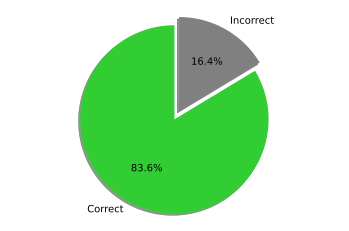

In [39]:
display(fig1)